In [286]:
#import required libraries
import pandas as pd

In [287]:
import numpy as np

In [288]:
%pip install seaborn

In [289]:
import seaborn as sns

In [290]:
import matplotlib.pyplot as plt

In [291]:
#store the data in a dataframe
df1=pd.read_csv("final_quiz_data.csv")

In [292]:
#get the names of the attributes
df1.columns

Index(['id', 'code', 'sex', 'age', 'zone', 'covid', 'diabetes', 'overweight',
       'cancer', 'VIH', 'renal', 'priority'],
      dtype='object')

In [293]:
#get the first 5 rows of the dataframe
df1.head()

,id,code,sex,age,zone,covid,diabetes,overweight,cancer,VIH,renal,priority
0,301,10101_126,F,97,1,1,2,2,2,2,2,16
1,208,10101_033,F,92,16,1,2,1,2,2,2,16
2,322,10101_147,M,96,7,1,2,1,2,2,2,16
3,156,10101_156,F,83,1,1,1,2,2,2,2,16
4,189,10101_014,M,91,9,1,2,2,2,2,2,16


In [294]:
#get the shape of the dataframe
df1.shape

(3904, 12)

In [295]:
#get the datatypes of the attributes present in the dataframe
df1.dtypes

id             int64
code          object
sex           object
age            int64
zone           int64
covid          int64
diabetes       int64
overweight     int64
cancer         int64
VIH            int64
renal          int64
priority       int64
dtype: object

In [296]:
#get info about the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3904 non-null   int64 
 1   code        3904 non-null   object
 2   sex         3904 non-null   object
 3   age         3904 non-null   int64 
 4   zone        3904 non-null   int64 
 5   covid       3904 non-null   int64 
 6   diabetes    3904 non-null   int64 
 7   overweight  3904 non-null   int64 
 8   cancer      3904 non-null   int64 
 9   VIH         3904 non-null   int64 
 10  renal       3904 non-null   int64 
 11  priority    3904 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 335.6+ KB


In [297]:
#find the descriptive statistics of the dataset
df1.describe()

,id,age,zone,covid,diabetes,overweight,cancer,VIH,renal,priority
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1952.500000,58.306352,10.592469,1.100154,1.949539,1.879611,1.991035,1.991547,1.951588,26.489242
std,1127.132054,22.981192,5.756673,0.300243,0.218922,0.325458,0.094271,0.091562,0.214662,4.118397
min,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000
25%,976.750000,39.000000,6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000
50%,1952.500000,59.000000,11.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000
75%,2928.250000,78.000000,16.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,29.000000
max,3904.000000,99.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,39.000000


In [298]:
#change the values of 2 and 1 in binary variable attributes to 1 and 0 respectively
binary_columns = ['covid', 'diabetes', 'overweight', 'cancer', 'VIH', 'renal']

for column in binary_columns:
    df1[column] = df1[column].apply(lambda x: 1 if x == 2 else 0)

# Verify the changes
print(df1.head())

    id       code sex  age  zone  covid  diabetes  overweight  cancer  VIH  \
0  301  10101_126   F   97     1      0         1           1       1    1   
1  208  10101_033   F   92    16      0         1           0       1    1   
2  322  10101_147   M   96     7      0         1           0       1    1   
3  156  10101_156   F   83     1      0         0           1       1    1   
4  189  10101_014   M   91     9      0         1           1       1    1   

   renal  priority  
0      1        16  
1      1        16  
2      1        16  
3      1        16  
4      1        16  


In [299]:
#check null values if any
df1.isnull().sum()

id            0
code          0
sex           0
age           0
zone          0
covid         0
diabetes      0
overweight    0
cancer        0
VIH           0
renal         0
priority      0
dtype: int64

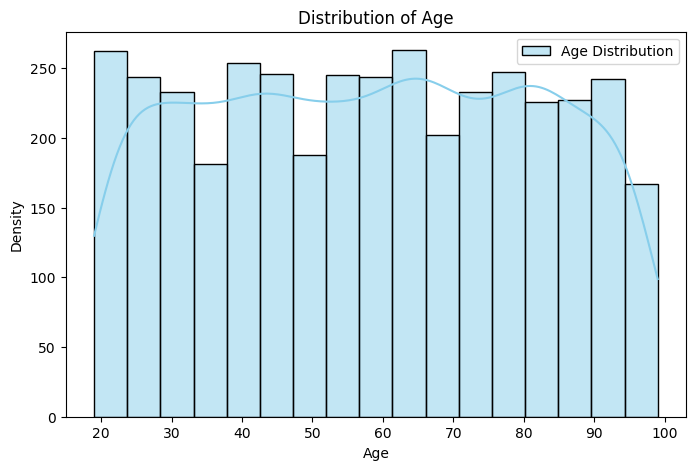

In [300]:
#check whether age attribute is skewed or not
plt.figure(figsize=(8, 5))
sns.histplot(df1['age'], kde=True, color='skyblue', label='Age Distribution')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

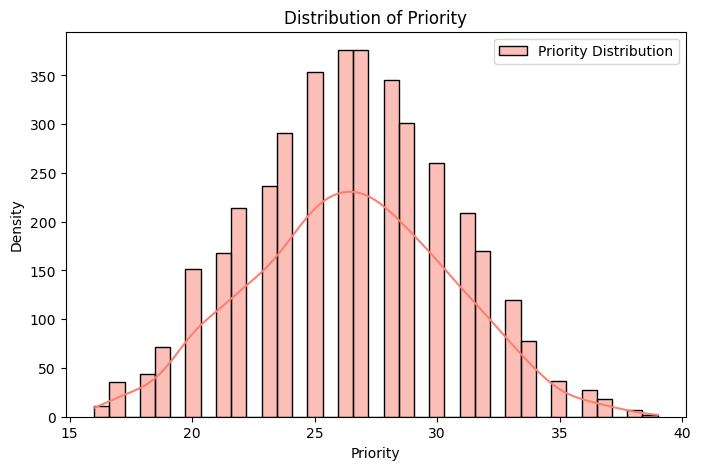

In [301]:
#check whether priority is distributed normally
plt.figure(figsize=(8, 5))
sns.histplot(df1['priority'], kde=True, color='salmon', label='Priority Distribution')
plt.title('Distribution of Priority')
plt.xlabel('Priority')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-302-3bd9b2a1f07f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='priority', data=df1, palette='Set2')


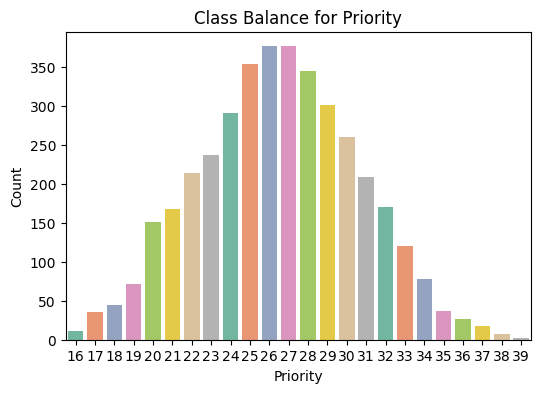

In [302]:
plt.figure(figsize=(6, 4))
sns.countplot(x='priority', data=df1, palette='Set2')
plt.title('Class Balance for Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

In [303]:
from scipy.stats import skew, norm

In [304]:
#find skewness value for the attribute age
age_skewness = skew(df1['age'])
print(f"Skewness of 'age' feature: {age_skewness}")

Skewness of 'age' feature: -0.007401402706291207


In [305]:
#find skewness value for the attribute priority
priority_skewness = skew(df1['priority'])
print(f"Skewness of 'priority' feature: {priority_skewness}")

Skewness of 'priority' feature: 0.0285547916776572


In [306]:
age_normal_test = norm.sf(abs(skew(df1['age'])))
if age_normal_test < 0.05:
    print("The 'age' feature does not follow a normal distribution.")
else:
    print("The 'age' feature follows a normal distribution.")

The 'age' feature follows a normal distribution.


In [307]:
#find percentage of people who have covid and who doesn't value covid
covid_proportion = df1['covid'].value_counts(normalize=True) * 100
print("Proportion of patients who have had Covid:")
print(covid_proportion)

Proportion of patients who have had Covid:
0    89.984631
1    10.015369
Name: covid, dtype: float64


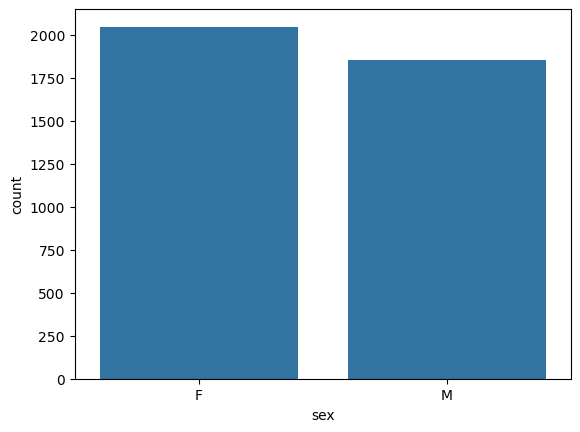

In [308]:
sns.countplot(x='sex', data=df1)
plt.show()

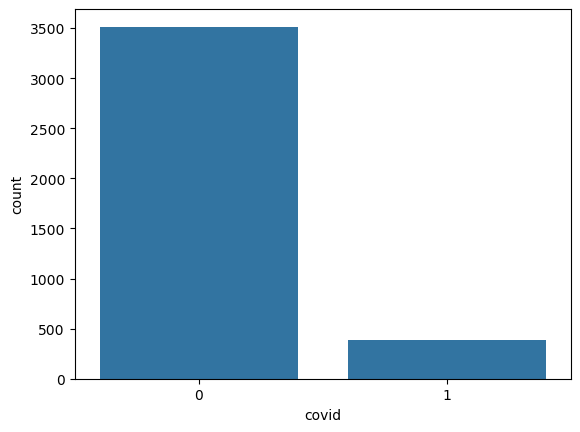

In [309]:
sns.countplot(x='covid', data=df1)
plt.show()

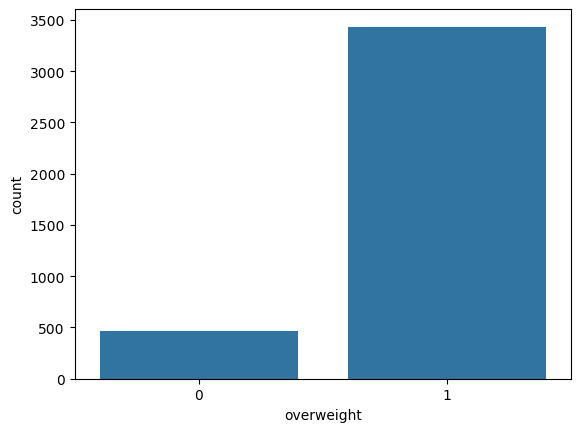

In [310]:
sns.countplot(x='overweight', data=df1)
plt.show()

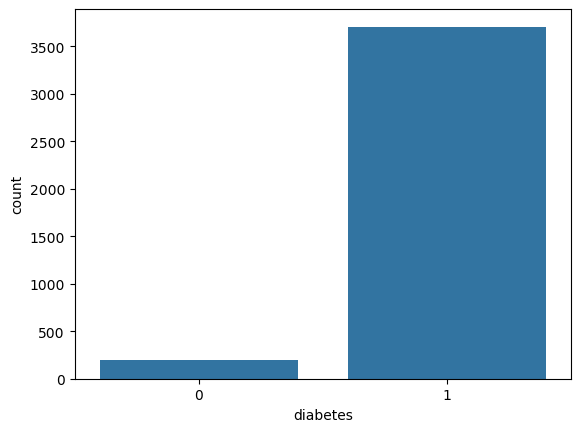

In [311]:
sns.countplot(x='diabetes', data=df1)
plt.show()

<ipython-input-312-a17af540187f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df1, palette='Set2')


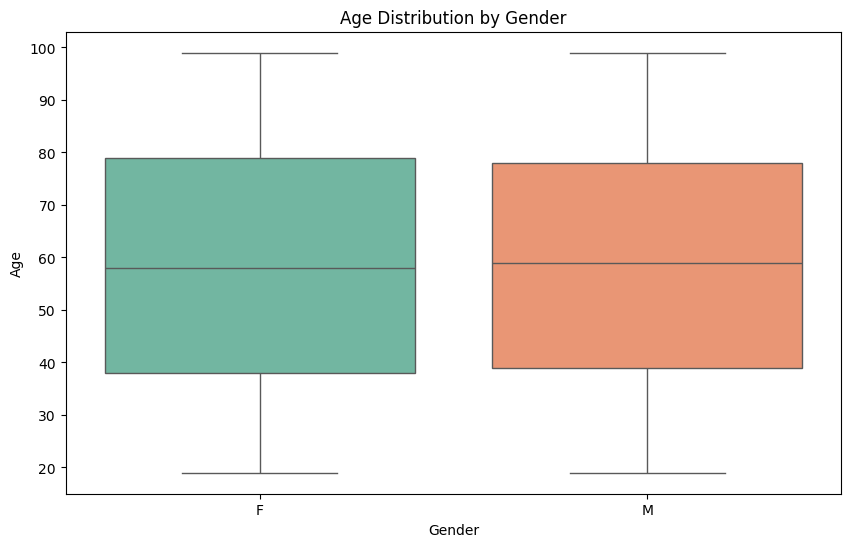

In [312]:
#plotting how age is related to sex attribute
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df1, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

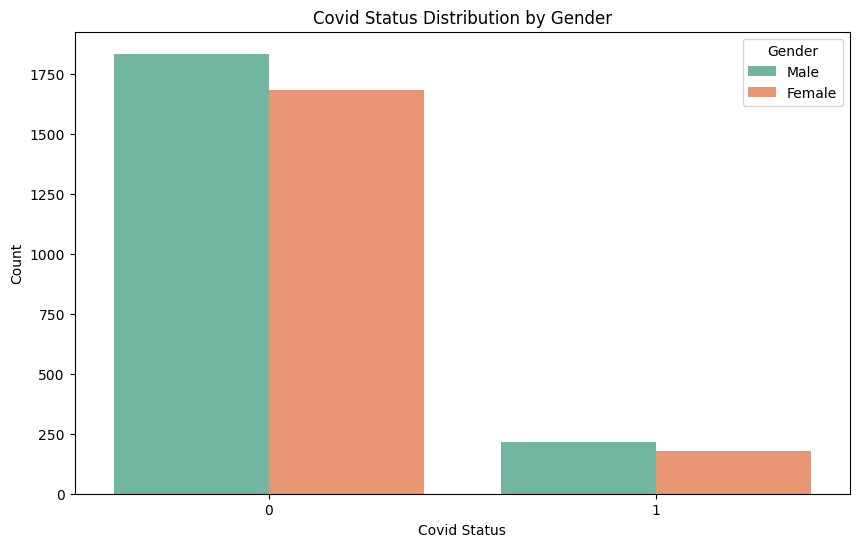

In [313]:
#covid distribution based on gender
plt.figure(figsize=(10, 6))
sns.countplot(x='covid', hue='sex', data=df1, palette='Set2')
plt.title('Covid Status Distribution by Gender')
plt.xlabel('Covid Status')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

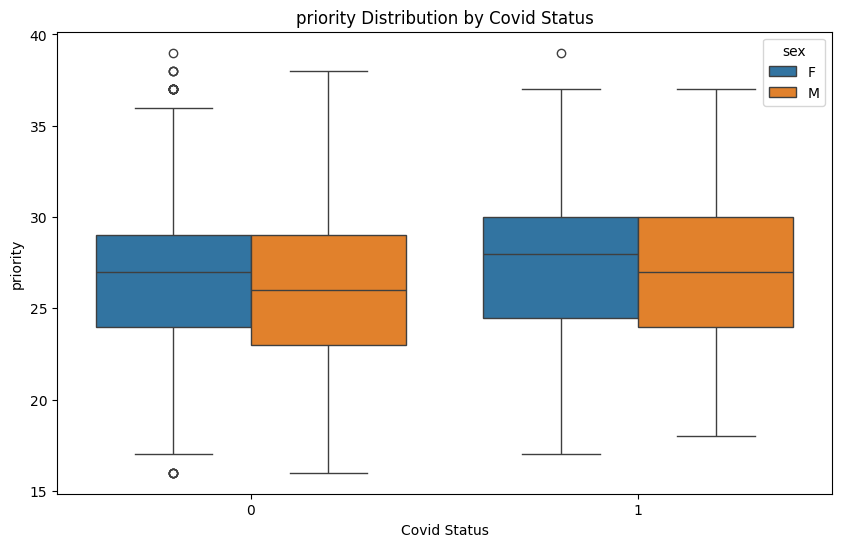

In [314]:
#priority distribution by covid and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='covid', y='priority',hue='sex', data=df1)
plt.title('priority Distribution by Covid Status')
plt.xlabel('Covid Status')
plt.ylabel('priority')
plt.show()

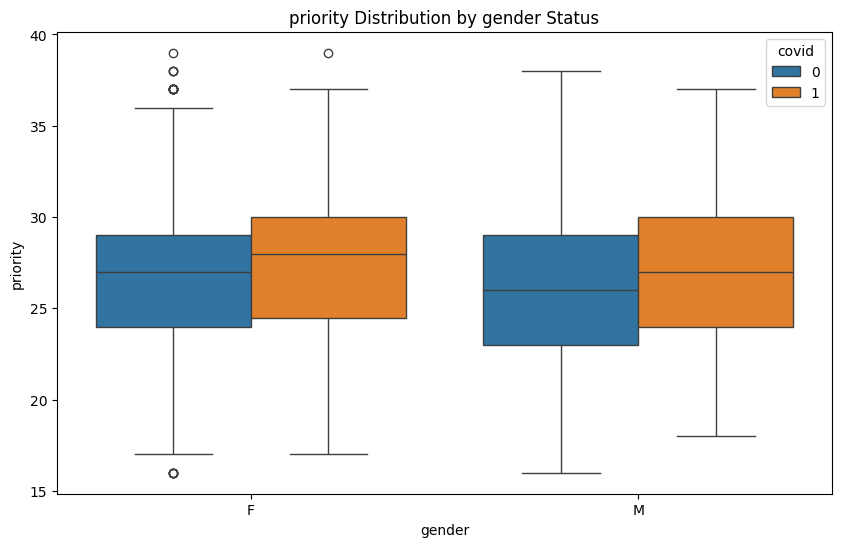

In [315]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='priority',hue='covid', data=df1)
plt.title('priority Distribution by gender Status')
plt.xlabel('gender')
plt.ylabel('priority')
plt.show()

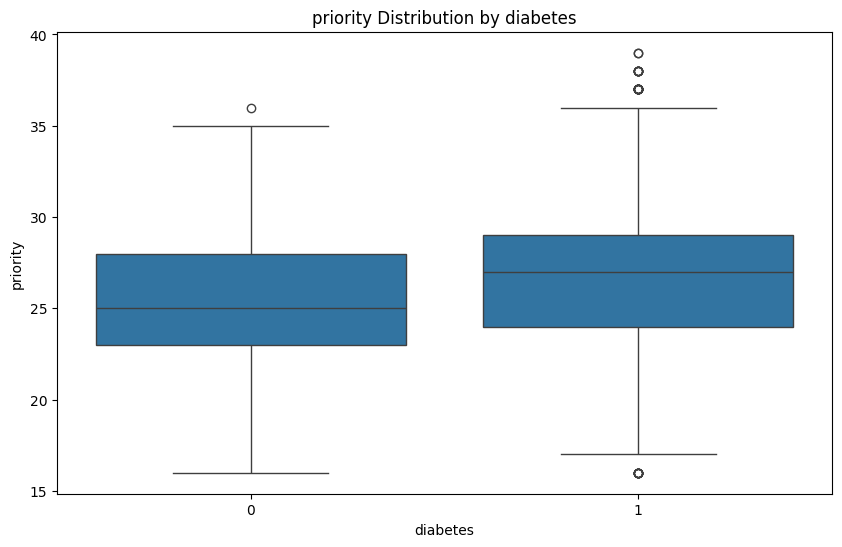

In [316]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='priority', data=df1)
plt.title('priority Distribution by diabetes')
plt.xlabel('diabetes')
plt.ylabel('priority')
plt.show()

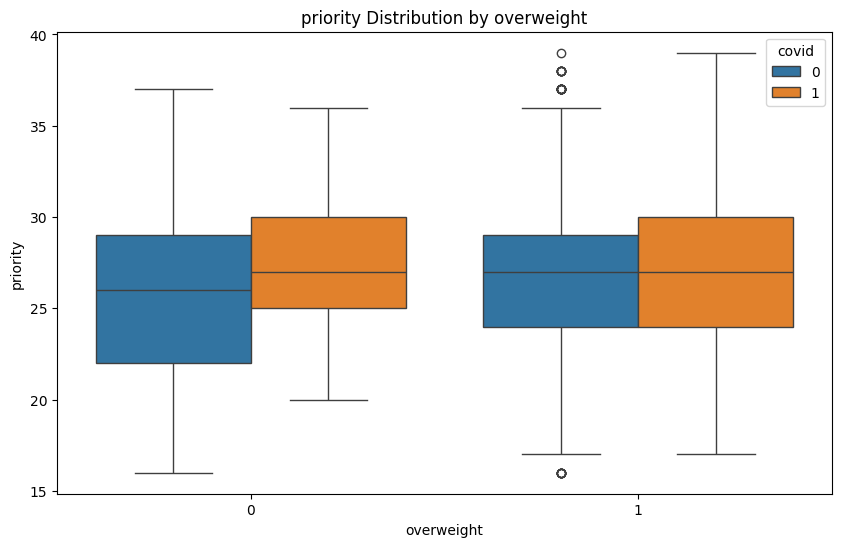

In [317]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='overweight', y='priority',hue='covid',data=df1)
plt.title('priority Distribution by overweight')
plt.xlabel('overweight')
plt.ylabel('priority')
plt.show()

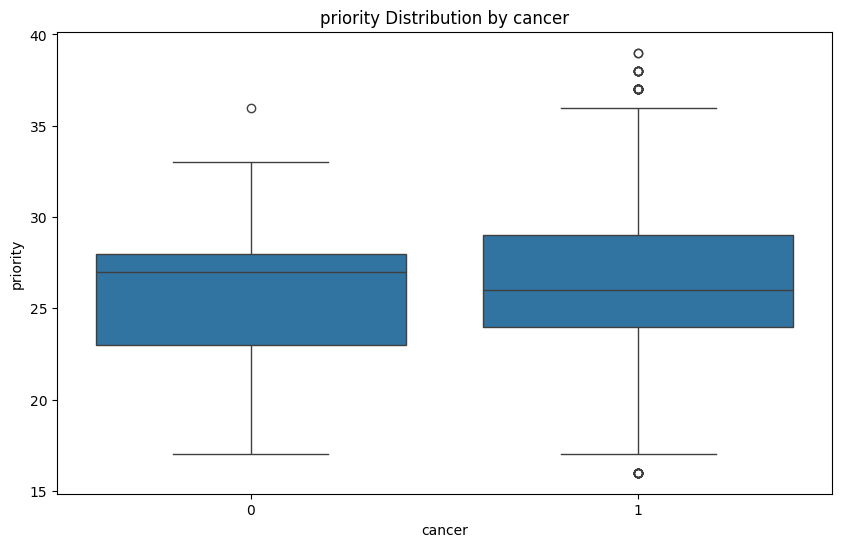

In [318]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancer', y='priority', data=df1)
plt.title('priority Distribution by cancer')
plt.xlabel('cancer')
plt.ylabel('priority')
plt.show()

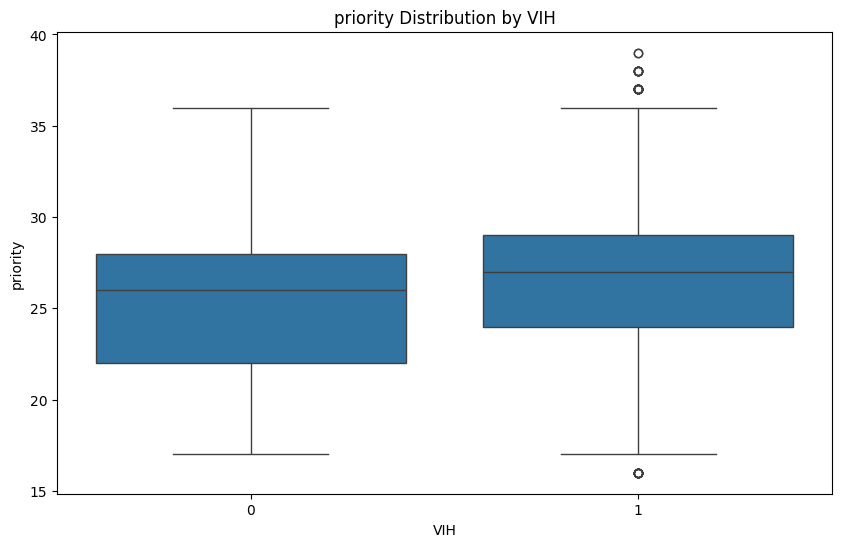

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='VIH', y='priority', data=df1)
plt.title('priority Distribution by VIH')
plt.xlabel('VIH')
plt.ylabel('priority')
plt.show()

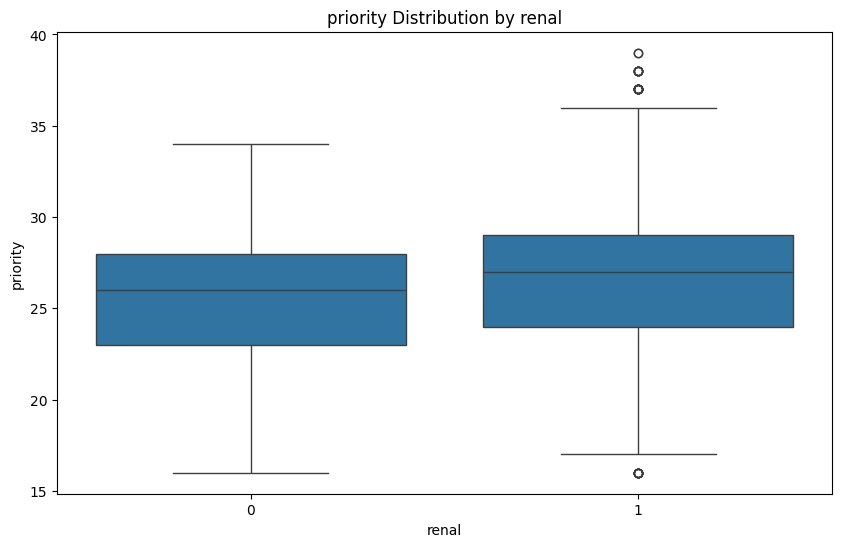

In [320]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='renal', y='priority', data=df1)
plt.title('priority Distribution by renal')
plt.xlabel('renal')
plt.ylabel('priority')
plt.show()

<ipython-input-321-3a870a7f5ca3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(condition_prevalence.keys()), y=[prevalence[1] for prevalence in condition_prevalence.values()], palette='pastel')


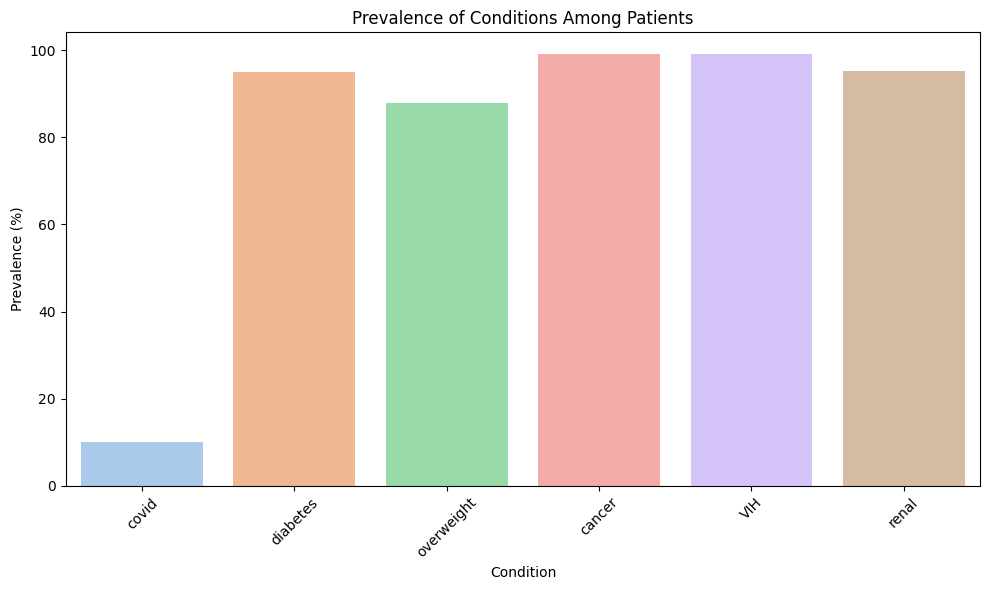

In [321]:
#percentage of patients with that particular condition
conditions = ['covid', 'diabetes', 'overweight', 'cancer', 'VIH', 'renal']
condition_prevalence = {}
for condition in conditions:
    condition_prevalence[condition] = df1[condition].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=list(condition_prevalence.keys()), y=[prevalence[1] for prevalence in condition_prevalence.values()], palette='pastel')
plt.title('Prevalence of Conditions Among Patients')
plt.xlabel('Condition')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-322-eb20bce3c5ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


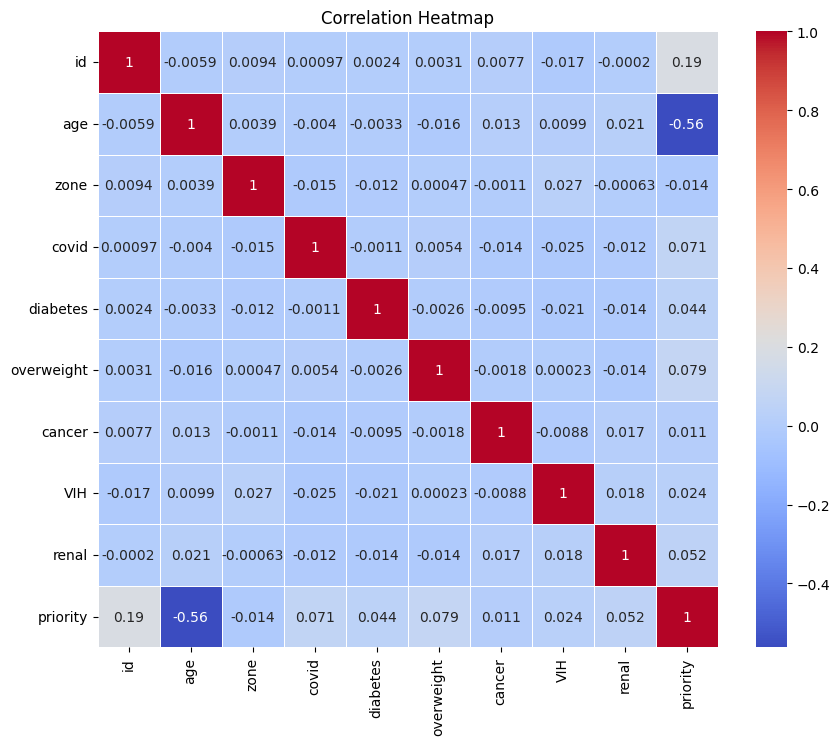

<ipython-input-322-eb20bce3c5ff>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_correlations.index, y=priority_correlations.values, palette='viridis')


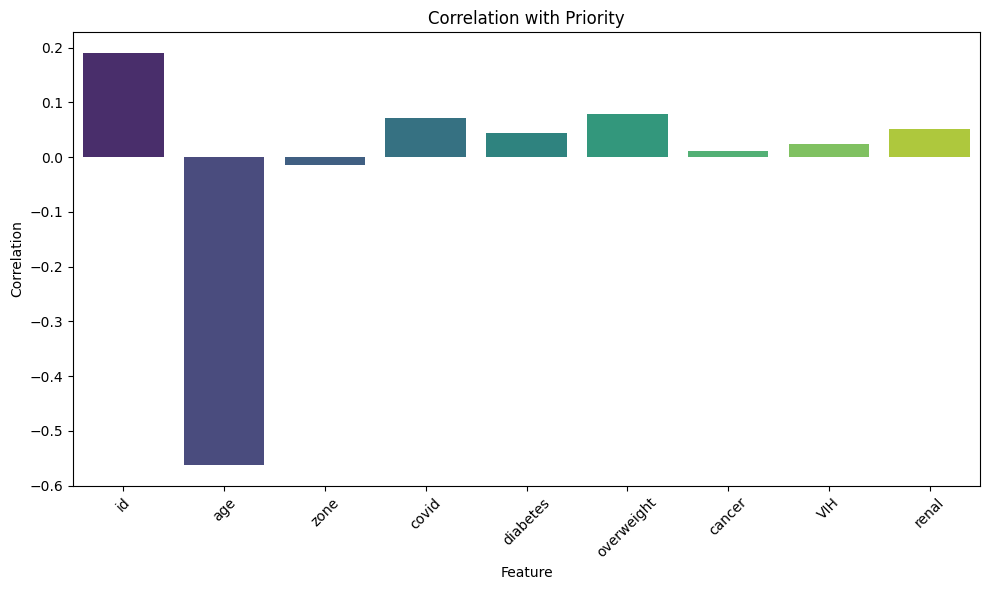

In [322]:
# Plot correlation heatmap
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract correlations with priority
priority_correlations = correlation_matrix['priority'].drop('priority')

# Plot bar chart of correlations with priority
plt.figure(figsize=(10, 6))
sns.barplot(x=priority_correlations.index, y=priority_correlations.values, palette='viridis')
plt.title('Correlation with Priority')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

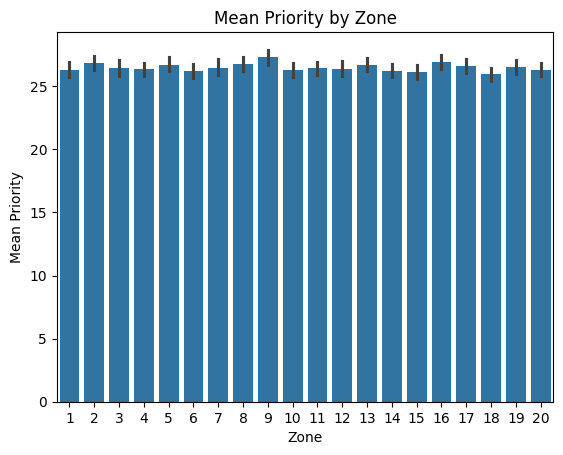

In [323]:
#mean priority level of patients in that zone
sns.barplot(x='zone', y='priority', data=df1)
plt.title('Mean Priority by Zone')
plt.xlabel('Zone')
plt.ylabel('Mean Priority')
plt.show()

In [324]:
#question 2 
#Grouping age attribute into different categories
#categorize each patient's age
bins = [0, 25, 60, float('inf')]  # Young: 0-25, Adult: 26-60, Elderly: 61 and above
labels = ['Young', 'Adult', 'Elderly']

# Create a new column 'age_category' based on age bins
df1['age_category'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the changes
print(df1.head())


    id       code sex  age  zone  covid  diabetes  overweight  cancer  VIH  \
0  301  10101_126   F   97     1      0         1           1       1    1   
1  208  10101_033   F   92    16      0         1           0       1    1   
2  322  10101_147   M   96     7      0         1           0       1    1   
3  156  10101_156   F   83     1      0         0           1       1    1   
4  189  10101_014   M   91     9      0         1           1       1    1   

   renal  priority age_category  
0      1        16      Elderly  
1      1        16      Elderly  
2      1        16      Elderly  
3      1        16      Elderly  
4      1        16      Elderly  


In [325]:
#question 2
#grouping priority attribute into different categories
bin_edges = [15,25,35, 40]  # Define the edges of the bins
bin_labels = ['High priority','Medium Priority', 'Low Priority']  # Define the labels for each bin

# Create a new column 'priority_category' based on the binning
df1['priority_category'] = pd.cut(df1['priority'], bins=bin_edges, labels=bin_labels, right=True)

# Display the updated DataFrame with the new column
print(df1.head())

    id       code sex  age  zone  covid  diabetes  overweight  cancer  VIH  \
0  301  10101_126   F   97     1      0         1           1       1    1   
1  208  10101_033   F   92    16      0         1           0       1    1   
2  322  10101_147   M   96     7      0         1           0       1    1   
3  156  10101_156   F   83     1      0         0           1       1    1   
4  189  10101_014   M   91     9      0         1           1       1    1   

   renal  priority age_category priority_category  
0      1        16      Elderly     High priority  
1      1        16      Elderly     High priority  
2      1        16      Elderly     High priority  
3      1        16      Elderly     High priority  
4      1        16      Elderly     High priority  


In [326]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [327]:
#question 2
df1['region'] = df1['code'].apply(lambda x: x.split('_')[0])

In [328]:
selected_features = ['sex', 'age_category', 'region','covid', 'diabetes', 'overweight', 'cancer', 'VIH', 'renal']
X = df1[selected_features]
y = df1['priority_category']

In [329]:
#one-hot encoding of all categorical features
X = pd.get_dummies(X)

In [330]:
#training and testing logistic regression and random forest classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Model Training - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_logreg=logreg_model.predict(X_test)
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, precision, recall, f1

# Evaluate Logistic Regression
logreg_acc, logreg_precision, logreg_recall, logreg_f1 = evaluate_model(logreg_model, X_test_scaled, y_test)

# Evaluate Random Forest Classifier
rf_acc, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test_scaled, y_test)

# Model Comparison
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_acc:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {rf_acc:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Metrics:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77

Random Forest Classifier Metrics:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74


In [331]:
#question 2
#encoding the priority attribute using Label encoder
from sklearn.preprocessing import LabelEncoder

# Extract the 'priority' feature
priority = df1['priority']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'priority' feature using label encoding
priority_encoded = encoder.fit_transform(priority)

# Replace the original 'priority' column with the encoded values
df1['priority_encod'] = priority_encoded
df1['priority_encod']

0        0
1        0
2        0
3        0
4        0
        ..
3899    14
3900    14
3901    16
3902    18
3903    19
Name: priority_encod, Length: 3904, dtype: int32

In [332]:
#building XGBoost model
from xgboost import XGBClassifier

In [333]:
from sklearn.model_selection import GridSearchCV

In [334]:
from sklearn.metrics import classification_report, confusion_matrix
y1 = df1['priority_encod']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)
# Initialize and train XGBoost model
model = XGBClassifier()
model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = model.predict(X_test1)

# Evaluate model
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)
precision_xg = precision_score(y_test1, y_pred1, average='weighted')
recall_xg = recall_score(y_test1, y_pred1, average='weighted')
f1_xg = f1_score(y_test1, y_pred1, average='weighted')
print("precison:", precision_xg)
print("recall:", recall_xg)
print("f1-score:", f1_xg)

Accuracy: 0.11011523687580026


/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precison: 0.10968783678573668
recall: 0.11011523687580026
f1-score: 0.1075183889490865


In [335]:
#building Support Vector Classifier(SVC) model
from sklearn.svm import SVC

In [336]:
model_svc = SVC(kernel='rbf',random_state=42,probability=True)

# Train the model
model_svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = model_svc.predict(X_test)

In [337]:
accuracy_svc =accuracy_score(y_test,y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print("SVC Model Evaluation:")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)

/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Model Evaluation:
Accuracy: 0.7605633802816901
Precision: 0.7504619628550092
Recall: 0.7605633802816901
F1 Score: 0.754947826747255


In [338]:
#Building K-Nearest Neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier

In [339]:
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN Model Evaluation:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1:", f1_knn)

KNN Model Evaluation:
Accuracy: 0.7298335467349552
Precision: 0.7287508915258377
Recall: 0.7298335467349552
F1: 0.7283137389749874


In [340]:
#building Naive Bayes Classification model
from sklearn.naive_bayes import GaussianNB

In [341]:
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = model_nb.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)

Naive Bayes Model Evaluation:
Accuracy: 0.4212548015364917
Precision: 0.6482301168528418
Recall: 0.4212548015364917
F1-score: 0.322257911361611


In [342]:
#build decision tree model
from sklearn.tree import DecisionTreeClassifier

In [343]:
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt=f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Decision Tree Model Evaluation:
Accuracy: 0.736235595390525
Precision: 0.7394451564956458
Recall: 0.736235595390525
F1-score: 0.737456552352508


In [344]:
#question-4:
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_acc:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")
print(" ")
print("SVC Model Evaluation:")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)

Logistic Regression Metrics:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
 
SVC Model Evaluation:
Accuracy: 0.7605633802816901
Precision: 0.7504619628550092
Recall: 0.7605633802816901
F1 Score: 0.754947826747255


In [345]:
#question-4
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Display confusion matrices
print("Confusion Matrix - Logistic Regression:")
print(cm_logreg)
print("\nConfusion Matrix - Support Vector Classifier:")
print(cm_svc)

Confusion Matrix - Logistic Regression:
[[ 38   0 275]
 [  0   0  13]
 [  0   0 455]]

Confusion Matrix - Support Vector Classifier:
[[239   0  74]
 [  0   0  13]
 [100   0 355]]
